
Underwater Fish Image Classification

Mount Drive

In [1]:
# Conection to google drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Extraction


Extract Data to mounted Drive in a created folder RUNMILA 

Note error after extraction "tar: A lone zero block at 997875"

In [ ]:
# Download the data for the challenge

!wget https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/Archive/fishRecognition_GT.tar

# .tar extraction

!tar --extract --verbose --file=fishRecognition_GT.tar -C '/content/drive/MyDrive/Runmila'

# You can further modify the file locations using the library os and glob

#Import required Modules

CV2 for Image processing,

OS for directory operations,

Matplotlib for Visualization

Random for randomization

Numpy for numerical calculations

In [15]:
import cv2
import os
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns

#View random images sample

View 10 random images from each of the 23 classes to compare and contrast things like Size, orientation,We also had to do manual scrutiny to confirm some observations such as the size, color, position of the fish in the images etc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


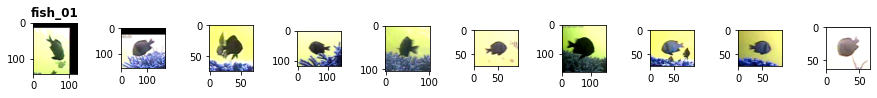

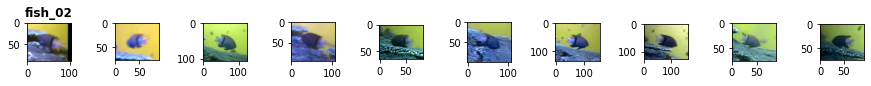

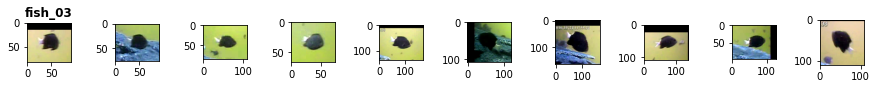

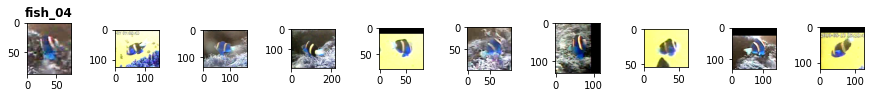

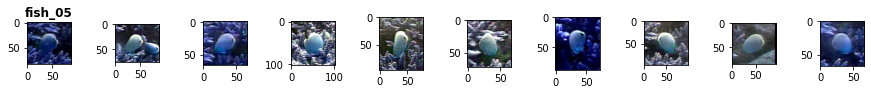

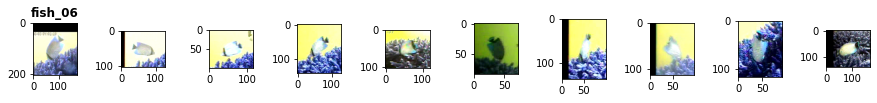

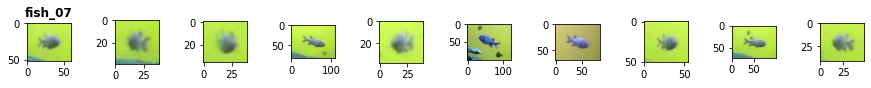

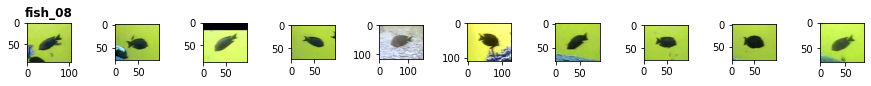

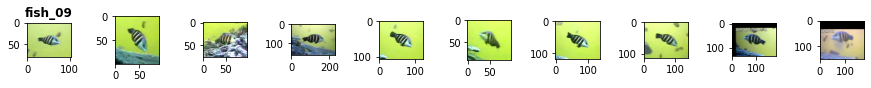

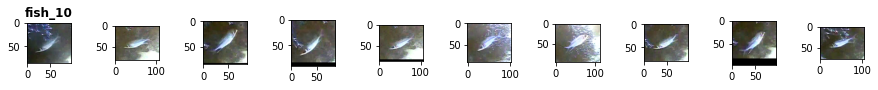

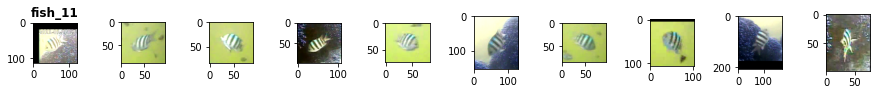

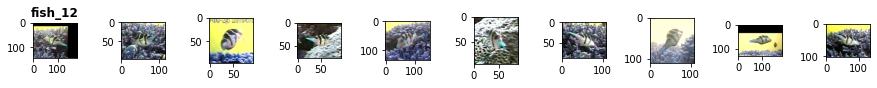

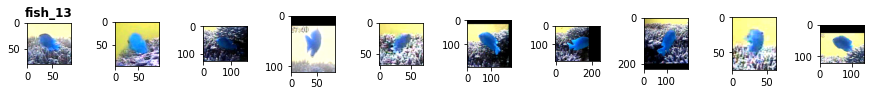

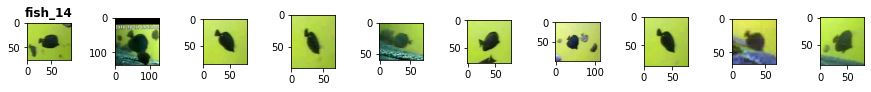

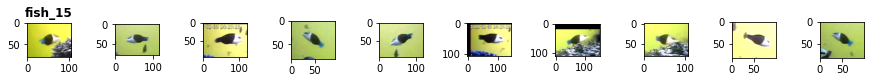

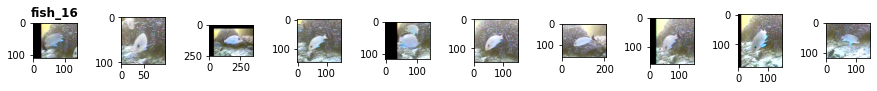

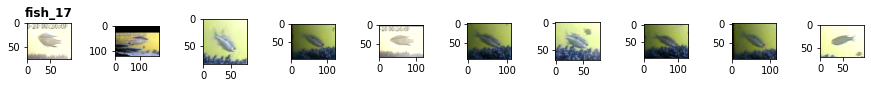

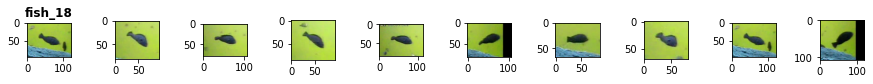

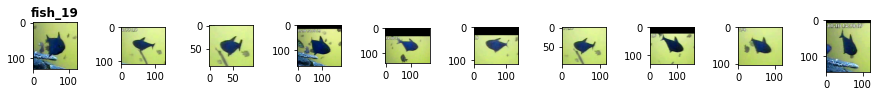

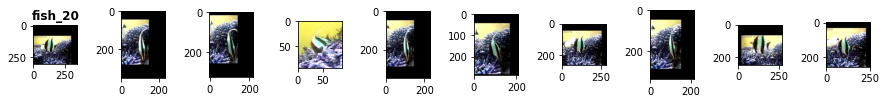

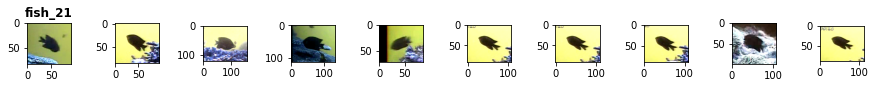

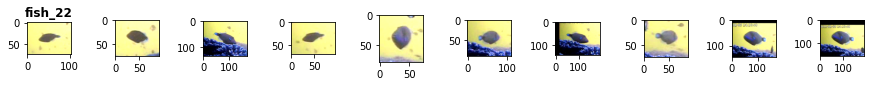

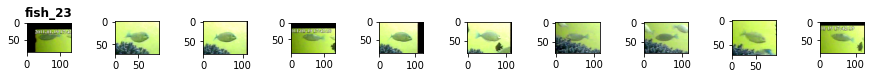

In [ ]:

for i in range(1,24):
  if i<=9:
    link="/content/drive/MyDrive/Runmila/fish_image/fish_0"
  else:
    link="/content/drive/MyDrive/Runmila/fish_image/fish_"
  randomlist = random.sample(os.listdir(link+str(i)), 10)
  fig, axs = plt.subplots(1,10, figsize=(15, 6))
  fig.subplots_adjust(hspace = 1, wspace=1)
  axs = axs.ravel()
  for image in randomlist:
    a=cv2.imread(link+str(i)+"/"+image)
    axs[randomlist.index(image)].imshow(a)
  axs[0].set_title(str(link+str(i)).split("/")[-1],fontweight="bold")
 

# Check size of each of the classes to compare and contrast

In [ ]:


print("CLASSES")
for i in range(1,24):
  if i<=9:
    link="/content/drive/MyDrive/Runmila/fish_image/fish_0"
  else:
    link="/content/drive/MyDrive/Runmila/fish_image/fish_"
  print("{} ------------------------------ {}".format(str(link+str(i)).split("/")[-1],len(os.listdir(link+str(i)))))

CLASSES
fish_01 ------------------------------ 12112
fish_02 ------------------------------ 2683
fish_03 ------------------------------ 3593
fish_04 ------------------------------ 4049
fish_05 ------------------------------ 2534
fish_06 ------------------------------ 190
fish_07 ------------------------------ 450
fish_08 ------------------------------ 218
fish_09 ------------------------------ 241
fish_10 ------------------------------ 299
fish_11 ------------------------------ 98
fish_12 ------------------------------ 147
fish_13 ------------------------------ 181
fish_14 ------------------------------ 90
fish_15 ------------------------------ 42
fish_16 ------------------------------ 206
fish_17 ------------------------------ 49
fish_18 ------------------------------ 56
fish_19 ------------------------------ 29
fish_20 ------------------------------ 21
fish_21 ------------------------------ 16
fish_22 ------------------------------ 41
fish_23 ------------------------------ 25


#image processing

Image processing operations used listed below

Standardization: made sure images have the same area

Reshaping: after manual scrutiny we made sure the fish classes are of the same shape

For classes with small image sets we applied flipping, rotating and skewing image processing techniques to duplicate the pre-existing images and added to the same class thereby giving the model more images data set to work with.



In [ ]:
# Note: I have standardized the images to hve similar area here

fish0 = []
for i in range(1,24):
  if i<=9:
    link="/content/drive/MyDrive/Runmila/fish_image/fish_0"
  else:
    link="/content/drive/MyDrive/Runmila/fish_image/fish_"

  for l in os.listdir(link+str(i)):
      image = cv2.imread(link+str(i)+"/"+l)
      image=cv2.resize(image, (100, 100))
      fish0.append (image)
      # print("working"+str(i)+l)         # Uncomment to see program working in case PC freezes


np.save('content/drive/MyDriveRunmila/fish.npy',fish0)

In [4]:
fish = np.load("/content/drive/MyDrive/Runmila/fish.npy")  

In [ ]:
fish.shape  #shape confirmation

(27370, 100, 100, 3)

In [6]:
# to ensure the channels are similar

from keras import backend as K

# CONSTANTS
NUM_CLASSES = 23
IMG_SIZE = (100, 100)


if K.image_data_format() == 'channels_first':
    fish = fish.reshape(fish.shape[0], 3, IMG_SIZE[0], IMG_SIZE[1])
    INPUT_SHAPE = (3, IMG_SIZE[0], IMG_SIZE[1])
else:
    fish = fish.reshape(fish.shape[0], IMG_SIZE[0], IMG_SIZE[1], 3)
    INPUT_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 3)

In [7]:
fish01=fish[0:12112]
fish02=fish[12112:14795]
fish03=fish[14795:18388]
fish04=fish[18388:22437]
fish05=fish[22437:24971]
fish06=fish[24971:25161]
fish07=fish[25161:25611]
fish08=fish[25611:25829]
fish09=fish[25829:26070]
fish10=fish[26070:26369]
fish11=fish[26369:26467]
fish12=fish[26467:26614]
fish13=fish[26614:26795]
fish14=fish[26795:26885]
fish15=fish[26885:26927]
fish16=fish[26927:27133]
fish17=fish[27133:27182]
fish18=fish[27182:27238]
fish19=fish[27238:27267]
fish20=fish[27267:27288]
fish21=fish[27288:27304]
fish22=fish[27304:27345]
fish23=fish[27345:27370]

In [ ]:
fish16.shape

(206, 100, 100, 3)

In [9]:
classes=[fish01,fish02,fish03,fish04,fish05,fish06,fish07,fish08,fish09,fish10,fish11,fish12,fish13,fish14,fish15,fish16,fish17,fish18,fish19,fish20,fish21,fish22,fish23]

In [10]:
# to increase the data for less populated classes


# all classes are relatively centered, so shifting is not necessary
#I will flip, because other classes have the fishes facing various directions
#I will rotate, because most images in the lesser class are at similar angles
# I will adjust the brightness of some classes, because brightness of a class seem similar but noticeably different from some oher
# I will zoom randomly
# I have standardized the images already when reading them
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator



for index,i in enumerate(classes):
  if i.shape[0] < 200:
    listaug=[random.randint(0, i.shape[0]-1) for j in range(15)]
    images=[]
    for k in listaug: 
      samples = expand_dims(i[k], 0)
      datagen = ImageDataGenerator(horizontal_flip=True,rotation_range=90,zoom_range=[0.5,1.0],brightness_range=[0.2,1.0])

      it = datagen.flow(samples, batch_size=1)
      for j in range(9):
        batch = it.next()
        image = batch[0].astype('uint8')
        # print(index+1)        # Uncomment to see program working in case PC freezes
        images.append(image)

    array1=np.array(images)
    classes[index] = np.concatenate([i, array1],axis=0)

In [11]:
# To see the result of data increment

total=0
print("CLASSES")

for i,k,j in zip(range(1,24),[fish01,fish02,fish03,fish04,fish05,fish06,fish07,fish08,fish09,fish10,fish11,fish12,fish13,fish14,fish15,fish16,fish17,fish18,fish19,fish20,fish21,fish22,fish23],classes):
  if i<=9:
    link="/content/drive/MyDrive/Runmila/fish_image/fish_0"
  else:
    link="/content/drive/MyDrive/Runmila/fish_image/fish_"
  print("{} -----------------------{}------- {}".format(str(link+str(i)).split("/")[-1],k.shape[0],j.shape[0]))
  
  total+=  j.shape[0]

print(total)

CLASSES
fish_01 -----------------------12112------- 12112
fish_02 -----------------------2683------- 2683
fish_03 -----------------------3593------- 3593
fish_04 -----------------------4049------- 4049
fish_05 -----------------------2534------- 2534
fish_06 -----------------------190------- 325
fish_07 -----------------------450------- 450
fish_08 -----------------------218------- 218
fish_09 -----------------------241------- 241
fish_10 -----------------------299------- 299
fish_11 -----------------------98------- 233
fish_12 -----------------------147------- 282
fish_13 -----------------------181------- 316
fish_14 -----------------------90------- 225
fish_15 -----------------------42------- 177
fish_16 -----------------------206------- 206
fish_17 -----------------------49------- 184
fish_18 -----------------------56------- 191
fish_19 -----------------------29------- 164
fish_20 -----------------------21------- 156
fish_21 -----------------------16------- 151
fish_22 --------------

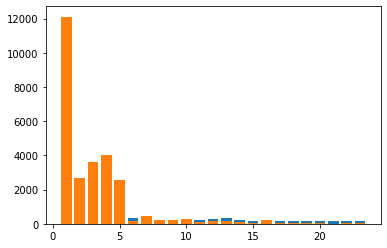

In [45]:
import matplotlib.pyplot as plt

ys = [i.shape[0] for i in classes]
xs = range(1,24)
zs = [i.shape[0] for i in [fish01,fish02,fish03,fish04,fish05,fish06,fish07,fish08,fish09,fish10,fish11,fish12,fish13,fish14,fish15,fish16,fish17,fish18,fish19,fish20,fish21,fish22,fish23]]


fig.set_size_inches(15, 6)
plt.bar(xs,ys)
plt.bar(xs,zs)
fig.show()





Create labels for the fish classes

In [ ]:
labels=[]

num=0
for item in classes:

  for i in range(item.shape[0]):
    labels.append([num])
  num+=1

print(len(labels))

29125


In [ ]:
# fish Data is combined to a single dataset

p=0
for i in classes:
  p+=1
  if p == 1:
    continue
  classes[0] = np.concatenate([classes[0], i],axis=0)

In [ ]:
classes[0].shape

(29125, 100, 100, 3)

In [ ]:
fishes=classes[0]
labels=labels

In [ ]:
#one hot encoding and Normalization to convert pixel values to a range from 0 to 1
from keras.utils import np_utils

labels2 = np_utils.to_categorical(labels, 23)

fishes = np.array(fishes).reshape(-1, 100, 100, 3)
fishes = fishes.astype('float32')
fishes /= 255

In [ ]:
print(fishes.shape)
print(labels2.shape)

(29125, 100, 100, 3)
(29125, 23)


In [ ]:
# save for reference

np.save("/content/drive/MyDrive/Runmila/fishes.npy",fishes)
np.save("/content/drive/MyDrive/Runmila/fishes_label.npy",labels2)

#Restart session because the available RAM for the free collab version might not be enough for the following steps.

In [ ]:
import numpy as np

fishes = np.load("/content/drive/MyDrive/Runmila/fishes.npy")
fishes_label = np.load("/content/drive/MyDrive/Runmila/fishes_label.npy")

#Split the Dataset

Split the Datatset into Train and Test, with training set set to 70% of Dataset



In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, y = shuffle(fishes, fishes_label, random_state=0)
print(y)
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state = 4)

batch_size = 25
nb_classes =23
nb_epochs = 5
nb_filters = 32
nb_pool = 2
nb_conv = 3

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


#Model Definition

Model was defined 
Activation function ReLU

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(100, 100, 3)), #input_shape=(100, 100, 3))
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(23,  activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data = (x_val, y_val))

Epoch 1/5
816/816 [==============================] - 265s 324ms/step - loss: 0.5528 - accuracy: 0.8405 - val_loss: 0.2687 - val_accuracy: 0.9166
Epoch 2/5
816/816 [==============================] - 264s 324ms/step - loss: 0.2385 - accuracy: 0.9256 - val_loss: 0.1982 - val_accuracy: 0.9420
Epoch 3/5
816/816 [==============================] - 264s 324ms/step - loss: 0.1540 - accuracy: 0.9523 - val_loss: 0.1668 - val_accuracy: 0.9508
Epoch 4/5
816/816 [==============================] - 265s 325ms/step - loss: 0.1189 - accuracy: 0.9632 - val_loss: 0.1408 - val_accuracy: 0.9607
Epoch 5/5
816/816 [==============================] - 264s 324ms/step - loss: 0.0875 - accuracy: 0.9727 - val_loss: 0.1412 - val_accuracy: 0.9578


plot history for loss

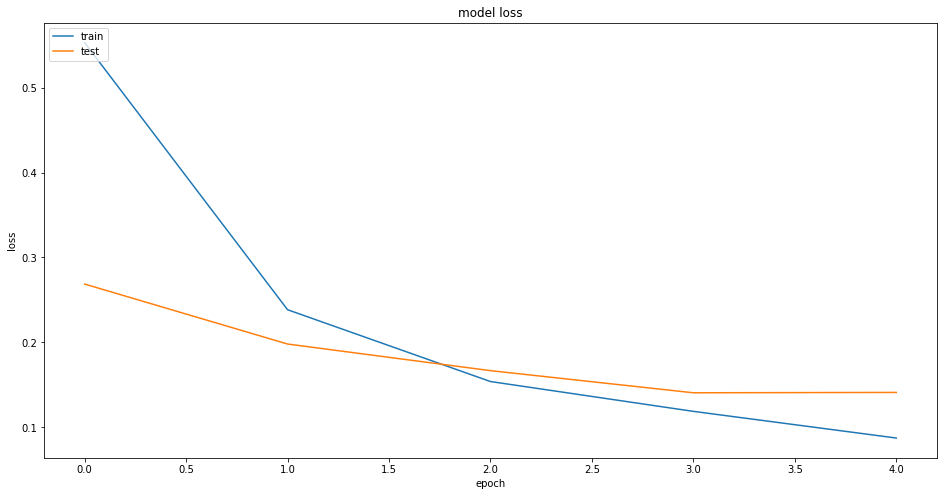

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#  Saving the model

model.save("/content/drive/MyDrive/Runmila/Group_one_model", history)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Runmila/Group_one_model/assets


In [ ]:
np.save("/content/drive/MyDrive/Runmila/x_val.npy",x_val)
np.save("/content/drive/MyDrive/Runmila/y_val.npy",y_val)